## Let's predict salary for a random years of experience
### We have 2 columns here, YearsExperience and Salary

Process data fromm csv

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('Salary_dataset.csv')
print(df[['YearsExperience', 'Salary']].head(10))

x=df['YearsExperience'].to_numpy()
y=df['Salary'].to_numpy()

   YearsExperience   Salary
0              1.2  39344.0
1              1.4  46206.0
2              1.6  37732.0
3              2.1  43526.0
4              2.3  39892.0
5              3.0  56643.0
6              3.1  60151.0
7              3.3  54446.0
8              3.3  64446.0
9              3.8  57190.0


Define training example size

In [2]:
m=x.shape[0]
print(f"Size of the training set is: {m}")

Size of the training set is: 30


Define cost function

In [3]:
def cost_function(w,b):
    cost=0
    for i in range(m):
        cost+=(w*x[i]+b-y[i])**2
    
    totalCost=cost/(2*m)
    return totalCost

Calculate derivatives for gradient descent

In [4]:
def derivatives(w,b):
    dj_dw=0
    dj_db=0

    for i in range(m):
        dj_dw+=(w*x[i]+b-y[i])*x[i]
        dj_db+=(w*x[i]+b-y[i])

    dj_dw/=m
    dj_db/=m

    return dj_dw, dj_db

Calculate gradient descent

In [5]:
import math

def gradient_descent(w,b,alpha,iterLimit):

    for i in range(iterLimit):

        dj_dw, dj_db=derivatives(w,b)

        w=w-alpha*dj_dw
        b=b-alpha*dj_db

        if i<10000:
            cost=cost_function(w,b)

        if i%math.ceil(iterLimit/100)==0:
            print(f"Iteration: {i:5} Cost: {cost: 0.3e}",
                  f"Weight: {w: 0.3e} Bias: {b: 0.3e}")
            
    return w,b



initialize parameters

In [6]:
w_init=0
b_init=0
alpha=1.0e-2

w,b=gradient_descent(w_init,b_init,alpha,100000)

print(f"w = {w: 8.4f} and b = {b: 8.4f}")

Iteration:     0 Cost:  1.298e+09 Weight:  4.850e+03 Bias:  7.600e+02
Iteration:  1000 Cost:  1.654e+07 Weight:  9.880e+03 Bias:  2.192e+04
Iteration:  2000 Cost:  1.565e+07 Weight:  9.505e+03 Bias:  2.447e+04
Iteration:  3000 Cost:  1.564e+07 Weight:  9.457e+03 Bias:  2.480e+04
Iteration:  4000 Cost:  1.564e+07 Weight:  9.451e+03 Bias:  2.484e+04
Iteration:  5000 Cost:  1.564e+07 Weight:  9.450e+03 Bias:  2.485e+04
Iteration:  6000 Cost:  1.564e+07 Weight:  9.450e+03 Bias:  2.485e+04
Iteration:  7000 Cost:  1.564e+07 Weight:  9.450e+03 Bias:  2.485e+04
Iteration:  8000 Cost:  1.564e+07 Weight:  9.450e+03 Bias:  2.485e+04
Iteration:  9000 Cost:  1.564e+07 Weight:  9.450e+03 Bias:  2.485e+04
Iteration: 10000 Cost:  1.564e+07 Weight:  9.450e+03 Bias:  2.485e+04
Iteration: 11000 Cost:  1.564e+07 Weight:  9.450e+03 Bias:  2.485e+04
Iteration: 12000 Cost:  1.564e+07 Weight:  9.450e+03 Bias:  2.485e+04
Iteration: 13000 Cost:  1.564e+07 Weight:  9.450e+03 Bias:  2.485e+04
Iteration: 14000 Cos

Predict Salary for some year experiences

In [7]:
xnew=6.6
ypred=w*xnew+b

print(f"For {xnew} years of experience your salary might be {ypred}")

For 6.6 years of experience your salary might be 87217.95528812667


## Comparison

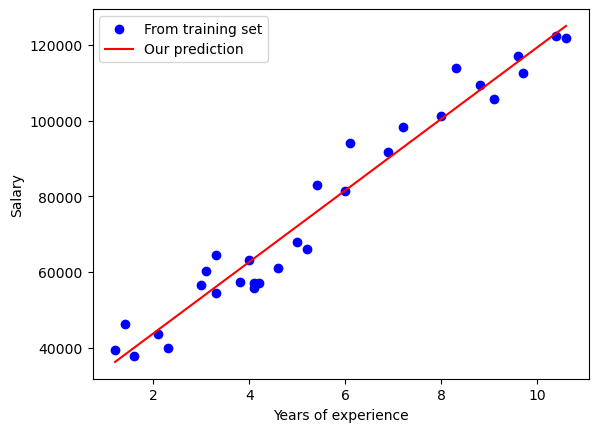

In [8]:
ypred=np.zeros_like(x)
for i in range(m):
    ypred[i]=w*x[i]+b

plt.scatter(x,y,c='b',label='From training set')
plt.plot(x,ypred,c='r',label='Our prediction')
plt.xlabel('Years of experience')
plt.ylabel('Salary')
plt.legend()
plt.show()